# Visualizing COVID
## By Allison Valdez

### Introduction:
This project explores COVID-19 data from the World Health Organization (WHO), and visualizes it using Plotly Express in Python. We explore the data in more than a dozen bar charts, line graphs, bubble charts, scatter plots, word clouds, and natural earth projections. This was a personal endevour as I was interested in what the COVID data was as in its various forms--hoping this would depart knowledge for further analysis for research. I saught to provide insight, although it is 20/20 vision in hindsight, how COVID impacted countless people as it moved throughout the world. The data examines and compares amongst countries: case numbers, the causes of death, case fatality rate, recovery rates, testing rates, and death rates. In closing, it sharpened my skillset to summerize modeling, provide simulations, and thorough analysis. 

### Tools used in the project: 
- Pandas
- Plotly
- Matplotlib
- Wordcloud
- Choropleth
- Jupyter Notebook

### Requirements to Build the Project: 
- Knowledge of Python
- Understanding of graphs and charts
- Data visualization experience

### Analysis: 

#### STEP 1: IMPORT DEPENDENCIES AND LIBRARIES
We will start the project by importing the necessary libraries and dependencies:

In [1]:
# Libraries for data analysis and manipulation
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import pandas as pd

# Libraries for data visualization
import matplotlib
import matplotlib.pyplot as plt

# Import Plotly to create tables 
from plotly.figure_factory import create_table

# Import Plotly's offline verision 
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [2]:
# Initialize Plotly
pio.renderers.default = 'iframe'

#### STEP 2: READ IN THE DATA AND SAVE IT INTO DATAFRAMES FOR PREVIEWING
We will read the data from our .csv files, and save them into dataframes called: dataset1, dataset2, and dataset3. For the reader's benefit, I listed the files utilized in this project and their contents:

1. covid.csv: contains Country/Region, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths, TotalRecovered, NewRecovered, ActiveCases, Serious, Critical, Tot Cases/1M pop, Deaths/1M pop, TotalTests, Tests/1M pop, WHO Region, iso_alpha.
   
2. covid_grouped: contains data for dates from 01/22/2020 to 07/27/2020, Country/Region, Confirmed, Deaths, Recovered, Active, New cases, New deaths, New recovered, WHO Region, iso_alpha.
   
3. coviddeath: contains real-world examples of a number of COVID-19 deaths and the cause of death.

Read in the data from the .csv file and preview it:

In [3]:
# Read the data 
dataset1 = pd.read_csv("./data/covid.csv")
dataset1.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF


Return a tuple of the number of rows and columns for dataset1:

In [4]:
# Dataset1's tuple
print(dataset1.shape)

(209, 17)


Over the next lines of code, we will return the size and column names of the dataframe for dataset1.

In [5]:
# Return the size and column names
print(dataset1.size)
dataset1.info()

3553
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
 16  iso_alpha         209 non-null    objec

Read in the next .csv file, save it, and preview it under a new dataframe: dataset2.

In [6]:
# Read in the next file
dataset2 = pd.read_csv("./data/covid_grouped.csv")
dataset2.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,iso_alpha
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,AFG
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,ALB
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,DZA
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,AND
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,AGO


Similarily to dataset1, we will return the: tuple, size, and column names of the dataframe for dataset2:

In [7]:
print(dataset2.shape)
print(dataset2.size)
dataset2.info()

(35156, 11)
386716
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
 10  iso_alpha       35156 non-null  object
dtypes: int64(7), object(4)
memory usage: 3.0+ MB


#### STEP 3: CLEANING THE DATASET

In this section we will clean our data. We will start with indexing the columns and droping unnessary data. We do not need the following columns from dataset1: NewCases, NewDeaths, NewRecovered. After dropping the unnessary data, we will preview the it to make sure we are capturing what we need:

In [8]:
dataset1.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'iso_alpha'],
      dtype='object')

In [9]:
# Drop NewCases, NewDeaths, NewRecovered columns via the drop method 
dataset1.drop(["NewCases", "NewDeaths", "NewRecovered"], axis=1, inplace=True)

Sample a random set of 5 values from the new dataset1:

In [10]:
# Sample
dataset1.sample(5)

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
122,Lithuania,Europe,2718121.0,2171,81.0,1656.0,434.0,6.0,799.0,30.0,540784.0,198955.0,Europe,LTU
162,Taiwan,Asia,23821199.0,477,7.0,443.0,27.0,NaN,20.0,0.3,82737.0,3473.0,WesternPacific,TWN
103,Hungary,Europe,9657785.0,4597,600.0,3463.0,534.0,8.0,476.0,62.0,352546.0,36504.0,Europe,HUN
26,Egypt,Africa,102516525.0,95006,4951.0,48898.0,41157.0,41.0,927.0,48.0,135000.0,1317.0,EasternMediterranean,EGY
194,Curaçao,North America,164161.0,31,1.0,28.0,2.0,NaN,189.0,6.0,1080.0,6579.0,NaN,NLD


With our new data, we will create a table with Plotly Express to preview what the data for the first fifteen countries:

In [11]:
# Use Plotly Express to a create table
dataset1_table = go.Table(
        header = dict(
            values = list(dataset1[["Country/Region", "Continent", "Population", "TotalCases", "TotalTests", "TotalDeaths", "TotalRecovered"]].head(15).columns)),
        cells = dict(
            values = [dataset1[col].head(15) for col in ["Country/Region", "Continent", "Population", "TotalCases", "TotalTests", "TotalDeaths", "TotalRecovered"]])
)

# Create the figure and pass the table trace as data
dataset1_table_figure = go.Figure(data = [dataset1_table])

# Update the layout and show the figure
dataset1_table_figure.update_layout(title_text="Table 1: Top 15 Countries From Dataset1 (Covid.csv) ", title_x=0.5)
dataset1_table_figure.show()

#### STEP 4: UTILIZING BAR GRAPHS TO COMPARE TOTAL CASES, TOTAL DEATHS, CASE FATALITY RATES, RECOVERY RATES, AND TESTING RATES BETWEEN COUNTRY/REGIONS (DATASET1)

We utilize Bar Graphs to visually represent and compare data across categories over time. This makes identifying trends, patterns, and outliers easier. Bar graphs can analyze relationships between either columns themselves, or between columns and rows. If we performed the analysis only between the columns then our data compares numerical variables. Conversely, performing the analysis between columns and rows compares categorical variables. 

We begin this section with utilizing Plotly Express. We can see the graph's labels, and other relevant information, by hovering over the graph's bars. We will compare the number of cases, deaths, case fatality rates, recovery rates, and testing rates between the different countries. 

The first graph, Figure 1, visualizes each country's COVID cases with the color intensity representing the amount of cases. In other words, the height and color of each bar represents the intensity and number of COVID cases for each country:

In [12]:
# Visualize the total amount of COVID cases with matching color intensity
fig1 = px.bar(
    dataset1,
    x = "Country/Region",
    y = "TotalCases",
    color = "TotalCases",
    title = "Figure 1: Total COVID Cases By Country",
    log_y= True,
    hover_data = ["Country/Region", "TotalCases"],
    labels={"Country/Region": "Country/Region", "TotalCases": "TotalCases"}
)

fig1.show()

The next graph visualizes a possible positive correlation between the number of cases and death outcomes. While the correlation is not explicit, a positive correlation potentially exists if countries with high death counts have high case amounts. Further study is needed to confirm the corelation.

Lastly, it is important to note the difference between the numerical intensity of deaths and a country's fatality rate. We will highlight the differences between the two below:

In [13]:
# For each country's cases visualize the intensity of the number of deaths
fig2 = px.bar(
    dataset1,
    x = "Country/Region",
    y = "TotalCases", 
    color = "TotalDeaths",
    title = "Figure 2: Cases Highlighting Death Intensity By Color and Country",
    log_y = True,
    hover_data = ["Country/Region", "TotalCases", "TotalDeaths"],
    labels={"Country/Region": "Country/Region", "TotalCases": "TotalCases", "TotalDeaths": "TotalDeaths" }
)

fig2.show()

The next graph plots the global death count highlighting its intensity for each country:

In [14]:
# Each countrys' number of deaths color coding the intensity
fig3 = px.bar(
    dataset1,
    x = "Country/Region",
    y = "TotalDeaths", 
    title = "Figure 3: Global Death Count Highlighting Death Intensity By Country",
    color = "TotalDeaths", 
    log_y = True,
    hover_data = ["Country/Region", "TotalDeaths"],
    labels={"Country/Region": "Country/Region", "TotalDeaths": "TotalDeaths"}
)

fig3.show()

Next we will calculate the Case Fatality Rate (CFR). Globally, the rate represents the percentage of diagnosed cases that resulted in death. This is not the same as the Death Rate which measures the number of deaths per population size. The CFR is used in epidemiology to understand the severity of a particular disease in a population. To calculate the CFR, you divide the deaths within a population by the number of cases and multiply by 100. CFR is often used as an indicator of fatality for patients of a particular disease.

This part of the section will highlight the difference between the case fatality rate, death rate, and the intensity of the number of deaths. For the readers benefit the CFR table is sorted in descending order--from the highest to lowest:

In [15]:
# Create a new column in the dataset for the CFR
dataset1["CFR"] = (dataset1["TotalDeaths"] / dataset1["TotalCases"]) * 100

# Sort the data so that our hypothesis is easier to prove
new_df_dataset1_cfr = pd.DataFrame(dataset1)
sorted_new_df_dataset1_cfr = new_df_dataset1_cfr.sort_values(by = "CFR", ascending = False)

# Create the table with the sorted death rate  
CFR_table = go.Table(
    header = dict(
        values = ["Country/Region", "CFR", "TotalDeaths", "TotalCases"]),
    cells = dict(
        values = [
            sorted_new_df_dataset1_cfr["Country/Region"],
            sorted_new_df_dataset1_cfr["CFR"],
            sorted_new_df_dataset1_cfr["TotalDeaths"],
            sorted_new_df_dataset1_cfr["TotalCases"]
        ]
    )
)

# Create the figure and pass the table trace as data
sorted_CFR_figure = go.Figure(data = [CFR_table])

# Update the layout and show the figure
sorted_CFR_figure.update_layout(title="Table 2: Countries Sorted by COVID-19 CFR")
sorted_CFR_figure.show()

Now that we calculated the CFR for each country, lets put in a table the death count data for the same:

In [16]:
# Sort the data for the number of deaths for each country
new_df_dataset1_td = pd.DataFrame(dataset1)
sort_total_deaths = new_df_dataset1_td[["Country/Region", "TotalDeaths", "TotalCases"]].sort_values(by = "TotalDeaths", ascending = False)

# Create a table with the new sorted number of deaths 
totaldeaths_table = go.Table(
        header = dict(
            values = ["Country/Region", "TotalDeaths", "TotalCases"]),
        cells = dict(
            values=[
                sort_total_deaths["Country/Region"],
                sort_total_deaths["TotalDeaths"],
                sort_total_deaths["TotalCases"]]   
        )
)

# Create the figure and pass the table trace as data 
totaldeaths_table_figure = go.Figure(data = [totaldeaths_table])

# Update the layout and show the figure
totaldeaths_table_figure.update_layout(title="Table 3: Countries Sorted By Number of Deaths from COVID 19")
totaldeaths_table_figure.show()

We see that although the USA has the highest number of deaths--it does not have the highest case fatality rate. Yemen is the country with the highest CFR at 28.73% with 508 people dying out of 1768 cases. We graphically depict the CFR below to illustrate this point. As you can see Yemen is the only yellow colored bar, with the highest CFR:

In [17]:
# Plot each country's CFR with its respective color intensity
fig4 = px.bar(
    dataset1,
    x = "Country/Region",
    y = "CFR", 
    title = "Figure 4: Global CFR Highlighting CFR's Intensity by Country",
    color = "CFR", 
    height = 500, 
    log_y = True,
    hover_data = ["Country/Region", "CFR", "TotalDeaths", "TotalCases"],
    labels={"Country/Region": "Country/Region", "CFR": "CFR", "TotalDeaths":"TotalDeaths", "TotalCases":"TotalCases"}
)

fig4.show()

Next we will analyze each country's overall recovery rate from COVID. For the reader's benefit, we will repeat some of the steps above but as a last step we will verify our calculations via a bar graph.

It is interesting to note, that although Yemen had the highest CFR Botswana had the worst recovery rate of 7.8%--Yemen's was atleast 50%.

In [18]:
# Create a new column in the dataset for the overall recovery rate of each country
dataset1["RecoveryRate"] = (dataset1["TotalRecovered"] / dataset1["TotalCases"]) * 100

# Sort the data
new_df_dataset1_recover = pd.DataFrame(dataset1)
sorted_new_df_dataset1_recover = new_df_dataset1_recover.sort_values(by = "RecoveryRate", ascending = True)

# Create the table with the sorted recovery rate  
recoveryrate_table = go.Table(
    header = dict(
        values = ["Country/Region", "RecoveryRate", "TotalRecovered", "TotalCases", "TotalDeaths"]),
    cells = dict(
        values = [
            sorted_new_df_dataset1_recover["Country/Region"],
            sorted_new_df_dataset1_recover["RecoveryRate"],
            sorted_new_df_dataset1_recover["TotalRecovered"],
            sorted_new_df_dataset1_recover["TotalCases"],
            sorted_new_df_dataset1_recover["TotalDeaths"]
            
        ]
    )
)

# Create the figure and pass the table trace as data
sorted_recoveryrate_figure = go.Figure(data = [recoveryrate_table])

# Update the layout and show the figure
sorted_recoveryrate_figure.update_layout(title="Table 4: Countries Sorted by COVID-19 Recovery Rate")
sorted_recoveryrate_figure.show()

In [19]:
# Visualize recovery rate for Bar Graph comparision 
fig5 = px.bar(
    dataset1,
    x = "Country/Region",
    y = "RecoveryRate", 
    title = "Figure 5: Global Recovery Rate Highlighting Recovery Rate's Intensity By Country",
    color = "RecoveryRate", 
    log_y = True,
    hover_data = ["Country/Region", "RecoveryRate", "TotalRecovered", "TotalDeaths", "TotalCases"],
    labels={"Country/Region": "Country/Region", "RecoveryRate": "RecoveryRate", "TotalRecovered":"TotalRecovered", "TotalDeaths":"TotalDeaths", "TotalCases":"TotalCases"}
)

fig5.show()

We see consistently that Botswana has the lowest recovery rate of 7.8% as it has the smallest darkest bar.

We will continue to study COVID's global recovery, this graph dispicts the color intensity of recovery for each country:

In [20]:
# Global recovered cases
fig6 = px.bar(
    dataset1,
    x = "Country/Region",
    y = "TotalCases", 
    title = "Figure 6: Total Cases Highlighting Recovery Intensity By Country",
    color = "TotalRecovered", 
    log_y = True,
    hover_data = ["Country/Region", "TotalRecovered", "TotalCases"],
    labels={"Country/Region": "Country/Region", "TotalRecovered": "TotalRecovered", "TotalCases": "TotalCases"}
)

fig6.show()

Next, lets analyze the total number of tests taken globally highlighting testing intensity:

In [21]:
# Total number of tests taken globally highlighting testing intensity.
fig7 = px.bar(
    dataset1,
    x = "Country/Region",
    y = "TotalCases",
    title = "Figure 7: Total Number Of Tests Taken Highlighting Testing Intensity By Country",
    color = "TotalTests", 
    log_y = True,
    hover_data = ["Country/Region", "TotalCases", "TotalTests"],
    labels={"Country/Region": "Country/Region", "TotalCases": "TotalCases", "TotalTests": "TotalTests"}
)

fig7.show()

Out of curiosity we will calculate the overal global testing rate. Just to see which country tested its population the most. As we have done previously, we will follow the same steps above to calculate the testing rate: 

In [22]:
# Create a new column in the dataset for the testing rate for each country
dataset1["TestingRate"] = (dataset1["TotalTests"] / dataset1["TotalCases"]) * 100

# Sort the data
new_df_dataset1_testing = pd.DataFrame(dataset1)
sorted_new_df_dataset1_testing = new_df_dataset1_testing.sort_values(by = "TestingRate", ascending = True)

# Create the table with the sorted recovery rate  
testingrate_table = go.Table(
    header = dict(
        values = ["Country/Region", "TestingRate", "TotalTests", "Population","TotalCases", "TotalDeaths"]),
    cells = dict(
        values = [
            sorted_new_df_dataset1_testing["Country/Region"],
            sorted_new_df_dataset1_testing["TestingRate"],
            sorted_new_df_dataset1_testing["TotalTests"],
            sorted_new_df_dataset1_testing["Population"],
            sorted_new_df_dataset1_testing["TotalCases"],
            sorted_new_df_dataset1_testing["TotalDeaths"]
        ]
    )
)

# Create the figure and pass the table trace as data
sorted_testingrate_figure = go.Figure(data = [testingrate_table])

# Update the layout and show the figure
sorted_testingrate_figure.update_layout(title="Table 5: Countries Sorted by COVID-19 Testing Rate")
sorted_testingrate_figure.show()

In [23]:
# Graphing data via Bar Graph horizontally
fig8 = px.bar(
    dataset1,
    x = "Country/Region",
    y = "TestingRate",
    title = "Figure 8: Global Testing Rate Highlighting Testing Rate's Intensity By Country",
    color = "TestingRate",
    log_y = True,
    hover_data = ["Country/Region", "TestingRate", "TotalTests", "TotalCases"],
    labels={"Country/Region": "Country/Region", "TestingRate": "TestingRate", "TotalTests": "TotalTests", "TotalCases": "TotalCases" }
)

fig8.show()

Surprisingly we see that although the US has the highest testing numbers, Laos had the highest testing rate for its population of 7,285,750 at rate of 146,870.0%. With the USA testing at a rate of 1,254.71% of its population of 331,198,130. On the other hand, Sudan's 43,943,536 populace tested itself at a rate of 3.4%. I suspect the numbers reflect that a smaller population testing itself more frequently has greater impact than a higher population testing less frequently. Based on what we observe in the data, it is likely for countries where testing rates are higher: the population might be conducting multiple tests per person, or smaller populations have higher testing implications. A seperate study might be worth it to find out the specific reason.

#### STEP 5: UTILIZING TIME-MERGED HORIZONTAL BAR GRAPHS TO COMPARE TESTING NUMBERS AND TESTING RATES BY CONTINENT (DATASET1)

Time-merged horizontal bar graphs are helpful when visualizing comparisions of categories over several periods of time. Below, readers will appreciate how tests and testing rates accumulated and changed over time:

In [24]:
# Time merge the testing numbers according to the continent
fig9 = px.bar(
    dataset1,
    x = "TotalTests",
    y = "Continent", 
    title = "Figure 9: Time-Merged Horizontal Bar Graph of Tests Highlighting Testing Intensity By Continent",
    color = "TotalTests",
    orientation = "h",
    log_x = True,
    hover_data = ["Country/Region", "Continent", "TotalTests", "Population"],
    labels={"TotalTests": "TotalTests", "Continent": "Continent", "Country/Region":"Country/Region", "Population":"Population"}
)

fig9.show()

In [25]:
# Time-merge the testing rate for continents
fig10 = px.bar(
    dataset1,
    x = "TestingRate",
    y = "Continent", 
    title = "Figure 10: Time-Merged Horizontal Bar Graph of Testing Rate Highlighting Testing Rate Intensity By Continent",
    color = "TestingRate",
    orientation = "h",
    log_x = True,
    hover_data = ["Continent", "Country/Region", "TestingRate", "Population"],
    labels={"TestingRate": "TestingRate", "Continent": "Continent", "Country/Region":"Country/Region", "Population": "Population"}
)

fig10.show()

#### STEP 6: UTILIZING BUBBLE CHARTS TO COMPARE TOTAL CASES BY CONTINENT (DATASET1) 

Bubble charts are scatter plots that visualize relationships between two or more variables by the size, position, and color of its bubbles. It is important to note, this section plots the data by continents not by country/region. Figure 11's bubble's color reflects a country's testing frequency and the bubble size emphasizes the number of COVID cases for all cases:

In [26]:
# COVID cases by continent highlighting number of tests in color and bubble size the amount of cases
fig11 = px.scatter(
    dataset1,
    x = "Continent",
    y = "TotalCases", 
    title = "Figure 11: Continential COVID Cases Highlighting Testing Intensity In Color And Case Amount By Size",
    color = "TotalTests",
    size = "TotalCases",
    log_y = True,
    size_max = 200,
    height = 650,
    hover_data = ["Continent", "Country/Region", "TotalTests", "TotalCases"], 
    labels={"Continent": "Continent", "Country/Region": "Country/Region", "TotalTests":"TotalTests", "TotalCases":"TotalCases"}
)

fig11.show()

Next, we will study the death intensity by color and case amount by size for the same dataframe: 

In [27]:
# COVID cases by continent highlighting death count by color and case numbers by size
fig12 = px.scatter(
    dataset1,
    x = "Continent",
    y = "TotalCases", 
    title = "Figure 12: Continential COVID Cases Highlighting Death Intensity In Color And Case Amount By Size",
    color = "TotalDeaths",
    size = "TotalCases",
    log_y = True,
    size_max = 200,
    height = 650,
    hover_data = ["Continent", "Country/Region", "TotalDeaths", "TotalCases"],
    labels={"Continent": "Continent", "Country/Region": "Country/Region", "TotalDeaths":"TotalDeaths", "TotalCases":"TotalCases"}
    
)

fig12.show()

#### STEP 7: CONTINUING UTILIZING BUBBLE CHARTS TO COMPARE TOTAL CASES, TOTAL DEATHS, TEST/1M POPULATION BY COUNTRY/REGION (DATASET1)

We continue our analysis with Bubble Charts. Except this time, we will examaine the amount of COVID cases by country:

In [28]:
# Analyze the number of cases by color and size by country
fig13 = px.scatter(
    dataset1,
    x = "Country/Region",
    y = "TotalCases",
    title = "Figure 13: COVID Cases Highlighting Case Intensity In Color And Case Numbers By Country",
    color = "TotalCases",
    size = "TotalCases",
    log_y = True,
    size_max = 115,
    hover_data = ["Country/Region", "TotalCases"],
    labels={"Continent": "Continent", "Country/Region": "Country/Region", "TotalCases":"TotalCases"}
)

fig13.show()

We see that the USA leads with the highest amount for reporting cases. Let continue our analysis to see if any other trends become evident that might explain why the USA leads. Let's start that task by looking at the TotalTest column. To plot the data for the TotalTest column we will have to perform a type conversion--since it has data that is not numeric:

In [29]:
# Preview the data and perform type conversions for non numeric data
print(dataset1["TotalTests"].dtype)
print(dataset1["TotalTests"].isnull().sum())

# Create a new dataframe
new_df_dataset1_totalTests = pd.DataFrame(dataset1)

# Force convert to numeric values
new_df_dataset1_totalTests["TotalTests"] = pd.to_numeric(new_df_dataset1_totalTests["TotalTests"], errors="coerce")
new_df_dataset1_totalTests["TotalTests"] = new_df_dataset1_totalTests["TotalTests"].fillna(0)

# Fill NaN values with 0's 
new_df_dataset1_totalTests.fillna({"TotalTests": 0}, inplace=True)

# Proceed to create the scatter plot
if not new_df_dataset1_totalTests.empty:
    fig14 = px.scatter(
        new_df_dataset1_totalTests,
        x = "Country/Region",
        y = "TotalTests",
        title = "Figure 14: COVID Tests Highlighting Death Count In Color And Case Amount By Country",
        color = "TotalDeaths",
        size = "TotalCases",
        log_y = True,
        size_max = 200,
        height = 650,
        hover_data = ["Country/Region", "TotalDeaths", "TotalTests"],
        labels = {"Country/Region": "Country/Region", "TotalDeaths": "TotalDeaths", "TotalTests": "TotalTests"}
    )

    fig14.show()
else:
    print("The dataset is empty after dropping NaN values.")

float64
18


Interesting enough we see that the United States also leads in testing its citizens--but also its citizens are dying the most. Let's take a closer look at the number of deaths. Again, a type conversion is required for working with the TotalDeath column:

In [30]:
# Preview the data and perform type conversions for non numeric data
print(dataset1["TotalDeaths"].dtype)
print(dataset1["TotalDeaths"].isnull().sum())

# Create a new dataframe
new_df_dataset1_totalDeaths = pd.DataFrame(dataset1)

# Force convert to numeric values
new_df_dataset1_totalDeaths["TotalDeaths"] = pd.to_numeric(new_df_dataset1_totalDeaths["TotalDeaths"], errors="coerce")
new_df_dataset1_totalDeaths["TotalDeaths"] = new_df_dataset1_totalDeaths["TotalDeaths"].fillna(0)

# Fill NaN values with 0's
new_df_dataset1_totalDeaths.fillna({"TotalDeaths": 0}, inplace=True)

# Proceed to create the scatter plot
if not new_df_dataset1_totalDeaths.empty:
    fig15 = px.scatter(
        new_df_dataset1_totalDeaths,
        x = "Country/Region",
        y = "TotalDeaths",
        title = "Figure 15: COVID Deaths Highlighting Death Count In Color And Size By Country",
        color = "TotalDeaths",
        size = "TotalDeaths",
        log_y = True,
        size_max = 125,
        hover_data = ["Country/Region", "TotalDeaths"],
        labels = {"Country/Region": "Country/Region", "TotalDeaths": "TotalDeaths"}
    )

    fig15.show()
else:
    print("The dataset is empty after dropping NaN values.")

float64
21


Now that we have a TotalDeaths column let's tease out the data a bit more. We can confirm that the United States has the highest death toll for COVID. Later on in our analysis we will visualize what specific cause of death was the most prevalent. For now lets analyze the death data in  Continential view before moving on.

In [31]:
# Isolate for continents and death count
if not new_df_dataset1_totalDeaths.empty:
    fig16 = px.scatter(
        new_df_dataset1_totalDeaths,
        x = "Country/Region",
        y = "TotalDeaths",
        title = "Figure 16: Continential COVID Deaths Highlighting By Color And Deaths By Size",
        color = "Continent",
        size = "TotalDeaths",
        log_y = True,
        size_max = 125,
        hover_data = ["Country/Region", "Continent", "TotalDeaths"],
        labels = {"Continent": "Continent", "Country/Region": "Country/Region", "TotalDeaths": "TotalDeaths"}
    )

    fig16.show()
else:
    print("The dataset is empty after dropping NaN values.")

We see something fascinating in Figure 16. We see that COVID is prevalent not only in the United States--but the whole North American continent. South America also has a high death toll. It seems that COVID patients die less in more temperate and desert climates.

Next we will take location out of our analysis and visually compare the number of cases to the number of deaths. Let's see if a linear relationship exists. Meaning the more cases we have the death toll increases:

In [32]:
# Visualize the cases and death toll
fig17 = px.scatter(
    new_df_dataset1_totalDeaths,
    x = "TotalCases",
    y = "TotalDeaths", 
    title = "Figure 17: COVID Cases Highlighting Death Count By Color And Size",
    color = "TotalDeaths",
    size = "TotalDeaths",
    log_y = True,
    log_x = True,
    size_max = 200,
    hover_data = ["Country/Region", "Continent", "TotalDeaths"],
    labels = {"Continent": "Continent", "Country/Region": "Country/Region", "TotalDeaths": "TotalDeaths"}
)

fig17.show()

We can confirm visually that a linear relationship exists between the cases and death count.

#### STEP 8: DATA VISUALIZATION WITH BAR GRAPHS (DATASET2)

Using dataset2's date column we will use Bar Graphs to analyze each country's recovered COVID cases:

In [33]:
# Visualize recovered COVID cases by date
fig18 = px.bar(
    dataset2,
    x = "Date",
    y = "Recovered",
    title = "Figure 18: Recovered COVID Cases By Date Highlighting Country/Region",
    color = "Country/Region",
    log_y = True,
    hover_data = ["Recovered", "Date", "Country/Region", "Confirmed"],
    labels = {"Recovered": "Recovered", "Country/Region": "Country/Region", "Date": "Date", "Confirmed": "Confirmed"}
)

fig18.show()

We see that China starts off with the best recovery cases in February, but at around April global recovery picks up with the United States taking the lead in recovery. Let's continue our study to view the distribution of the new cases for the same period:

In [34]:
# Visualize the new case rate 
fig19 = px.bar(
    dataset2,
    x = "Date",
    y = "New cases",
    title = "Figure 19: New COVID Cases By Date Highlighting Country/Region",
    color = "Country/Region",
    log_y = True,
    hover_data = ["New cases", "Date", "Country/Region", "Confirmed"],
    labels = {"New cases": "New cases", "Country/Region": "Country/Region", "Date": "Date", "Confirmed": "Confirmed"}
)

fig19.show()

Because the data looks crowded in Figures 18 and 19 we will redo the analysis in line plots. However, we can clearly see the data starts out with China having the most new cases, however by March the status quo starts to shift with eventually the USA taking the lead. 

#### STEP 9: SINGLING OUT AMERICA'S DATA (DATASET2)

Next we will only take the US's data into account using dataset2. We start the analysis by making a new dataframe to analyze new cases amongst US citizens. We can clearly see how quickly the sickness spread between March and April:
 

In [35]:
# This is the bar graph observes the rate of daily new cases:
df_US= dataset2.loc[dataset2["Country/Region"]=="US"]

fig20 = px.bar(
    df_US,
    x = "Date",
    y = "New cases",
    title = "Figure 20: Daily New Cases Of COVID For US Highlighting New Case Numbers",
    color= "New cases",
    hover_data = ["Date", "New cases", "Confirmed", "Date", "Country/Region"],
    log_y = True,
    labels = {"New cases": "New cases", "Confirmed": "Confirmed", "Date": "Date", "Country/Region": "Country/Region"}
)

fig20.show()

In [36]:
# Isolating for the US analyze daily recovery
fig21 = px.bar(
    df_US,
    x = "Date",
    y = "Recovered", 
    title = "Figure 21: Recovery From COVID For US Cases By Date Highlighting Recovery Numbers",
    color = "Recovered",
    hover_data = ["Date", "Recovered", "Confirmed", "Country/Region"], 
    log_y = True,
    labels = {"Recovered": "Recovered", "Country/Region": "Country/Region", "Date": "Date", "Confirmed": "Confirmed"}
)

fig21.show()

What is most promising is that although many citizens are getting sick the recovery looks promising for patients.

#### STEP 10: UTILIZING LINE PLOTS

Line plots are used when you want to visualize how a variable changes over time. These plots are able to: quickly show trends, compare changes between multiple groups or categories over time, and highlight cycles in data. Using dataset2, we will revisit the global recovery and acquring of new COVID cases. However, since we have so many countries it is easy for the graph to get convoluted. Therefore we will sort the data to take the Top 50 or so countries: 

In [37]:
# Create new dataframe
new_df_dataset2_recover = pd.DataFrame(dataset2)

# Sort and select countries by recovered cases
top_50_Countries_Recover = new_df_dataset2_recover.groupby("Country/Region")["Recovered"].max().sort_values(ascending = False).head(50).index
filtered_df_recovered = new_df_dataset2_recover[new_df_dataset2_recover["Country/Region"].isin(top_50_Countries_Recover)]

# Visualize recovered COVID cases by date
fig22 = px.line(
    filtered_df_recovered,
    x = "Date",
    y = "Recovered",
    title = "Figure 22: Top 50 Countries That Recovered From COVID By Date",
    color = "Country/Region",
    log_y = True,
    hover_data = ["Recovered", "Date", "Country/Region", "Confirmed"],
    labels = {"Recovered": "Recovered", "Country/Region": "Country/Region", "Date": "Date", "Confirmed": "Confirmed"}
)

fig22.show()


Contrary to what we saw in Figure 18, Brazil overtakes China around July 2020 for best recovery for patients. Next, lets revist the daily new cases of COVID. We will repeat the same steps as above to gather the Top 50 Countries for this category:

In [38]:
# Create new dataframe
new_df_dataset2_daily = pd.DataFrame(dataset2)

# Sort and select countries by daily new case numbers
top_50_Countries_newCases = new_df_dataset2_daily.groupby("Country/Region")["New cases"].max().sort_values(ascending = False).head(50).index
filtered_df_newCases = new_df_dataset2_daily[new_df_dataset2_daily["Country/Region"].isin(top_50_Countries_newCases)]

# Visualize the new case rate 
fig23 = px.line(
    filtered_df_newCases,
    x = "Date",
    y = "New cases",
    title = "Figure 23: New COVID Cases By Date Highlighting Country/Region",
    color = "Country/Region",
    log_y = True,
    hover_data = ["New cases", "Date", "Country/Region", "Confirmed"],
    labels = {"New cases": "New cases", "Country/Region": "Country/Region", "Date": "Date", "Confirmed": "Confirmed"}
)

fig23.show()

Luckily, we can confirm the same conclusions that we had in the previous section. We see the US overtakes China for acquiring more daily cases of COVID. 

#### STEP 11: UTILIZING SCATTER PLOTS (DATASET2)

To visualize correlation, scatter plots are used to display relationships between two or more continuous variables. Different features of the graph can highlight the strength and nature of the shared relationship. Positive correlation is observed when both variables increase, negative corelation occurs if one variable increases as the other decreases, and no corelation if no pattern is displayed.

Using scatter plots we will see if a relationship exists between the US's confirmed cases and death rates.

In [39]:
# US confirmed cases plotted against deaths
fig24 = px.scatter(
    df_US,
    x = "Confirmed",
    y = "Deaths",
    title = "Figure 24: Comparing US Confirmed Cases Against Deaths Numbers Highlighting Death Intensity",
    color = "Deaths",
    size = "Deaths",
    hover_data=["Date", "Confirmed", "Deaths"],
    labels={"Confirmed": "Confirmed", "Deaths": "Deaths", "Date": "Date"}
)

fig24.show()

Clearly Figure 24 depicts a positive correlation between Confirmed cases and Death outcomes for US patients. We see as the confirmed cases rises the death toll also increases exponentially.

#### STEP 12: CHOROPLETHS (DATASET2)

Choropleths are thematic maps that plot variables with varying color intensity. For Figure 25, the darker the color, the higher the confirmed infections of COVID globally. The animation depicts the spread of COVID from January to July 2020. We will analyze the global rate of confirmed cases and death. Viewing the data in this manner enables us to see how COVID spread globally:

In [40]:
# Confirmed cases of COVID globally
fig25 = px.choropleth(
    dataset2,
    locations = "iso_alpha",
    color = "Confirmed",
    hover_name="Country/Region",
    color_continuous_scale = "Viridis",
    animation_frame="Date",
    title = "Global Spread of COVID",
    labels = {"Date": "Date", "Confirmed": "Confirmed"},
    hover_data = ["Date", "Confirmed"],
)

fig25.show()

Next we will view how death moved thoroughout the globe from January to July:

In [41]:
# Global death toll from COVID
fig26 = px.choropleth(
    dataset2,
    locations = "iso_alpha",
    color = "Deaths",
    hover_name="Country/Region",
    color_continuous_scale= "Viridis",
    animation_frame="Date",
    title = "Global Death Toll From COVID",
    labels = {"Date": "Date", "Deaths": "Deaths", "Country/Region": "Country/Region"},
    hover_data = ["Date", "Deaths", "Country/Region"]
)

fig26.show()

#### STEP 13: NATURAL EARTH PROJECTION (DATASET2)

Natural Earth Projection is a pseudocylindrical map designed to show the world's physical data. It is used in geospatial analysis for its ability to handle large volumes of data for effective visualization. This section will take a look at the world's rate of recovery and the WHO's rate of recovery. 

In [42]:
# Global recovery of COVID
fig27 = px.choropleth(
    dataset2,
    locations = "iso_alpha",
    color = "Recovered",
    hover_name="Country/Region",
    color_continuous_scale = "RdYlGn",
    animation_frame="Date",
    title = "Global Recovery Numbers of COVID",
    labels = {"Date": "Date", "Recovered": "Recovered", "Country/Region": "Country/Region"},
    hover_data = ["Date", "Recovered", "Country/Region"],
    projection = "natural earth"
)

fig27.show()

At the end of the animation we see that the United States and Brazil had the best recovery rate amongst their patients. Sadly, the rest of the world does not fair as well.

#### STEP 14: WORD CLOUD (DATASET3)

Word clouds are visual representations of text data the size of each word represents its frequency in the data. The more frequent the word appears, the larger and bolder it appears within the cloud. This makes it easy to quickly understand themes in the data. Working with dataset3 we will find the leading causes of death from COVID for patients in the United States. We will analyze both the condition and condition group of death. For the Word Cloud to populate properly we first have to: convert the array of data into a list, consolidate our strings into one, and then visualize the string into a word cloud.

In [43]:
# Import the dataset and preview the data
dataset3 = pd.read_csv("./data/coviddeath.csv")
dataset3.head(300)

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
0,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,122.0,NaN
1,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,596.0,NaN
2,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,1521.0,NaN
3,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,4186.0,NaN
4,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,10014.0,NaN
...,...,...,...,...,...,...,...,...,...,...
295,08/30/2020,02/01/2020,08/29/2020,AK,Circulatory diseases,Ischemic heart disease,I20-I25,65-74,NaN,Counts less than 10 suppressed.
296,08/30/2020,02/01/2020,08/29/2020,AK,Circulatory diseases,Ischemic heart disease,I20-I25,75-84,NaN,Counts less than 10 suppressed.
297,08/30/2020,02/01/2020,08/29/2020,AK,Circulatory diseases,Ischemic heart disease,I20-I25,85+,NaN,Counts less than 10 suppressed.
298,08/30/2020,02/01/2020,08/29/2020,AK,Circulatory diseases,Ischemic heart disease,I20-I25,Not stated,NaN,Counts less than 10 suppressed.


In [44]:
dataset3.tail(200)

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
12060,08/30/2020,02/01/2020,08/29/2020,YC,Respiratory diseases,Respiratory failure,J96,0-24,13.0,NaN
12061,08/30/2020,02/01/2020,08/29/2020,YC,Respiratory diseases,Respiratory failure,J96,25-34,51.0,NaN
12062,08/30/2020,02/01/2020,08/29/2020,YC,Respiratory diseases,Respiratory failure,J96,35-44,136.0,NaN
12063,08/30/2020,02/01/2020,08/29/2020,YC,Respiratory diseases,Respiratory failure,J96,45-54,411.0,NaN
12064,08/30/2020,02/01/2020,08/29/2020,YC,Respiratory diseases,Respiratory failure,J96,55-64,964.0,NaN
...,...,...,...,...,...,...,...,...,...,...
12255,08/30/2020,02/01/2020,08/29/2020,YC,Coronavirus Disease 2019,COVID-19,U071,65-74,5024.0,NaN
12256,08/30/2020,02/01/2020,08/29/2020,YC,Coronavirus Disease 2019,COVID-19,U071,75-84,5381.0,NaN
12257,08/30/2020,02/01/2020,08/29/2020,YC,Coronavirus Disease 2019,COVID-19,U071,85+,4841.0,NaN
12258,08/30/2020,02/01/2020,08/29/2020,YC,Coronavirus Disease 2019,COVID-19,U071,Not stated,NaN,Counts less than 10 suppressed.


Lets create a summary of how many entries exists for each condition:

In [45]:
# Group data by condition and count
dataset3.groupby(["Condition"]).count()

,Data as of,Start Week,End Week,State,Condition Group,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
Condition,,,,,,,,,
Adult respiratory distress syndrome,540,540,540,540,540,540,540,272,268
All other conditions and causes (residual),540,540,540,540,540,540,540,363,177
Alzheimer disease,530,530,530,530,530,530,530,144,386
COVID-19,540,540,540,540,540,540,540,377,163
Cardiac arrest,520,520,520,520,520,520,520,219,301
Cardiac arrhythmia,540,540,540,540,540,540,540,192,348
Cerebrovascular diseases,530,530,530,530,530,530,530,187,343
Chronic lower respiratory diseases,540,540,540,540,540,540,540,229,311
Diabetes,540,540,540,540,540,540,540,276,264


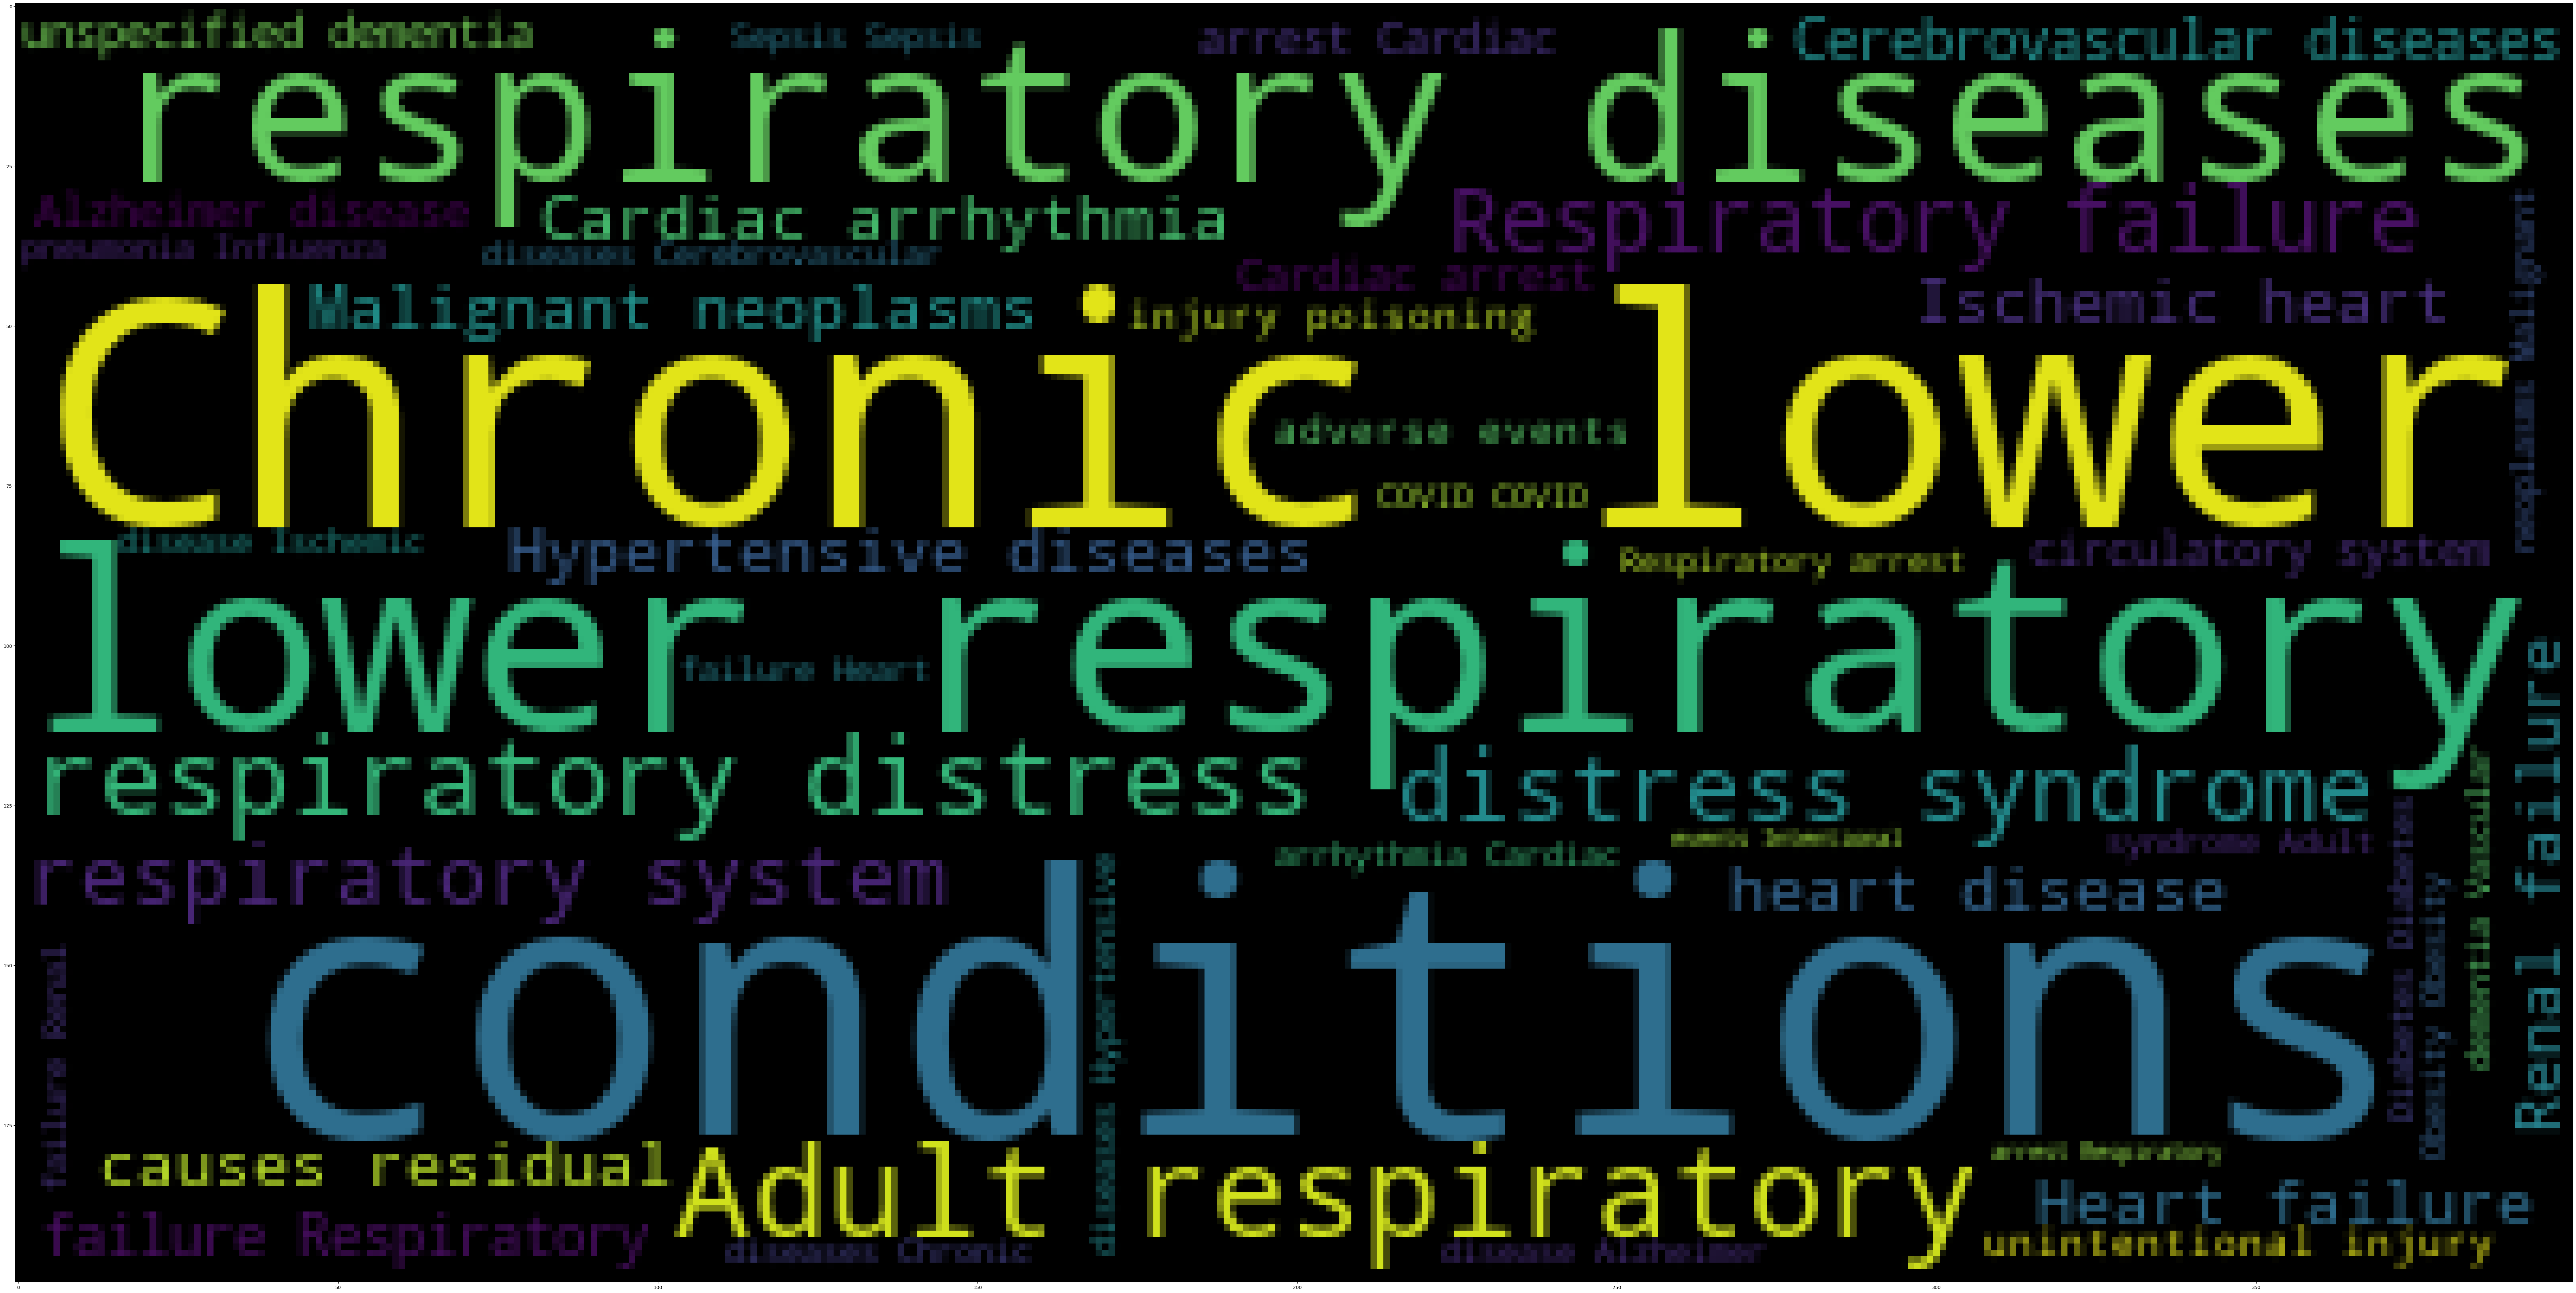

In [46]:
# Import Word Cloud
from wordcloud import WordCloud

# First convert the array of data into a list, then consolidate our strings into one, then visualize the
# string into a word cloud
convert_to_list = dataset3["Condition"].tolist()
convert_to_one_string = ' '.join(convert_to_list)

# Convert the string into WordCloud
plt.figure(figsize = (100, 100))
plt.imshow(WordCloud().generate(convert_to_one_string))

Now lets look at the condition group, we will repeat the same steps as above:

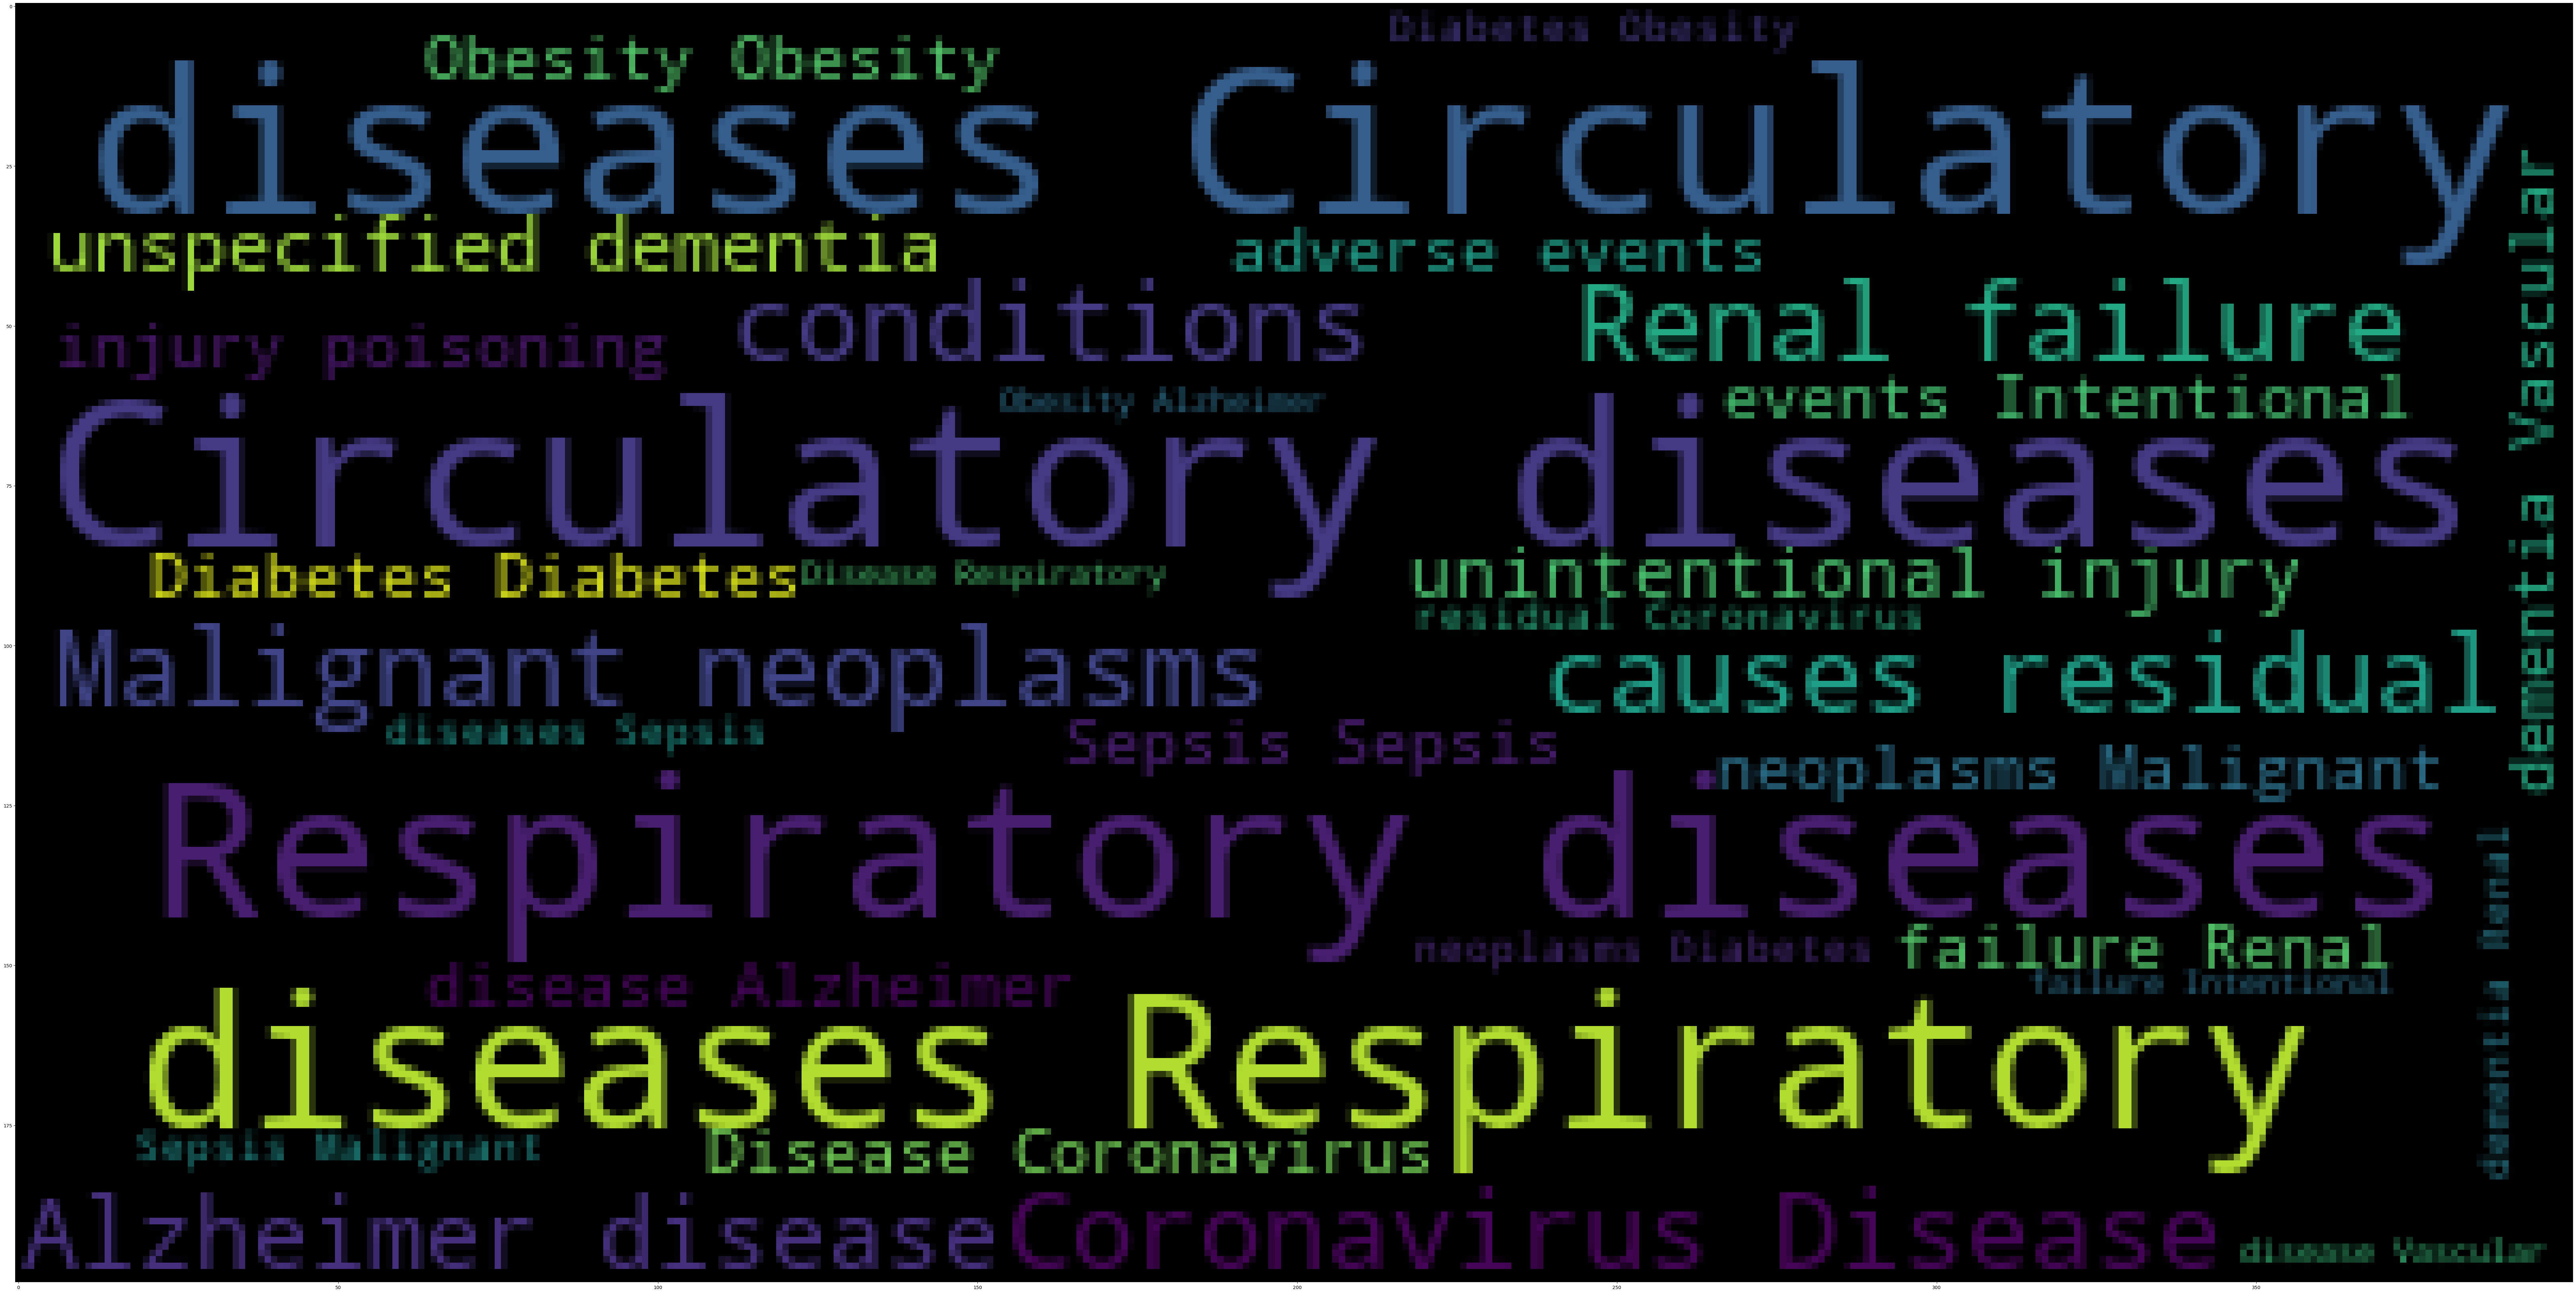

In [47]:
convert_to_list_2 = dataset3["Condition Group"].tolist() 
convert_to_one_string_2 = ' '.join(convert_to_list_2)

plt.figure(figsize = (100, 100))
plt.imshow(WordCloud().generate(convert_to_one_string_2))

Lets see the top causes of death to cross reference the Word Cloud.

In [48]:
top_causes = dataset3["Condition"].value_counts().sort_values(ascending=False)
print(top_causes)

Condition
Influenza and pneumonia                                                      540
Chronic lower respiratory diseases                                           540
Adult respiratory distress syndrome                                          540
Respiratory failure                                                          540
Other diseases of the respiratory system                                     540
Hypertensive diseases                                                        540
Ischemic heart disease                                                       540
Renal failure                                                                540
Cardiac arrhythmia                                                           540
Heart failure                                                                540
Malignant neoplasms                                                          540
COVID-19                                                                     540
All other conditio

Lets see the top group of death to cross reference the Word Cloud.

In [49]:
top_condition_group = dataset3["Condition Group"].value_counts().sort_values(ascending=False)
print(top_condition_group)

Condition Group
Circulatory diseases                                                        3740
Respiratory diseases                                                        3180
Malignant neoplasms                                                          540
Diabetes                                                                     540
All other conditions and causes (residual)                                   540
Coronavirus Disease 2019                                                     540
Renal failure                                                                540
Sepsis                                                                       530
Vascular and unspecified dementia                                            530
Alzheimer disease                                                            530
Obesity                                                                      530
Intentional and unintentional injury, poisoning and other adverse events     520
Name: count,

Therefore we can confirm the top causes of death were Influenza and pneumonia--although it is a little less clear. The top causes of death for conditions group were Circulatory diseases.

#### Conclusion:
Hindsight is indeed 20/20. This analysis highlighted how COVID spread thoroughout the world and what countries were impacted the most, and which faired the best. It would be interesting to continue our analysis into various's countries cause and condition of deaths amongst their population--however there might be significant roadblocks to gather that information. 